In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# Домашнее задание

### Easy

Решите систему линейных уравнений: 

3x - 2y = -6 

5x + y = 3

In [3]:
A = np.array([[3, -2], [5, 1]])
b = np.array([-6, 3])

In [4]:
result = linalg.solve(A, b)
result

array([0., 3.])

In [5]:
np.dot(A, result) == b

array([ True,  True])

**Ответ: x = 0, y = 3**

### Normal / Hard

В репозитории лежит файл 00000e74ad.npy. Он описывает процесс слияния двух черных дыр, зафиксированный с помощью лазерных интерферометров. Загрузите его в массив numpy. У вас должен получиться массив 3 * 4096 (три разных устройства делали запись одного события 2048 раз в секунду в течение 2 секунд).

Отмасштабируйте сигнал (поделите все значения на максимальное по массиву).

In [6]:
from scipy.signal import normalize

In [7]:
data = np.load(r'C:\Users\UserOfPC\Documents\Бруноям окт_2023\00000e74ad.npy')

In [8]:
data.shape

(3, 4096)

In [9]:
data_max = np.max(data)
data_max

1.7053709364481296e-20

In [10]:
data_normal = data / data_max
data_normal

array([[-0.34879834, -0.34303121, -0.31806287, ..., -0.35575778,
        -0.34968681, -0.33762651],
       [ 0.05719618,  0.02653887,  0.00268941, ..., -0.64272356,
        -0.64365256, -0.65005288],
       [-0.1025419 , -0.06936133, -0.11330308, ...,  0.08590639,
         0.12820956,  0.09035332]])

### Только Hard

Самостоятельно ознакомьтесь с методами обработки сигнала в scipy.signal. Попробуйте отфильтровать сигнал в диапазоне 30-400 Гц.

In [19]:
from scipy import signal

In [13]:
sos = signal.butter(16, [30, 400], btype="bandpass", output="sos", fs=2048)
data_filt = signal.sosfilt(sos, data_normal, axis=1)

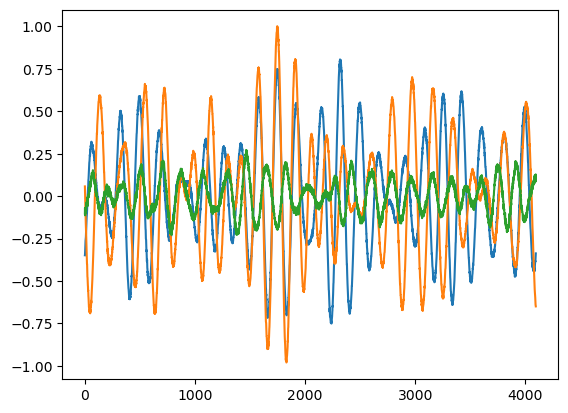

In [16]:
# Данные до фильтрации
for line in data_normal:
    plt.plot(line);

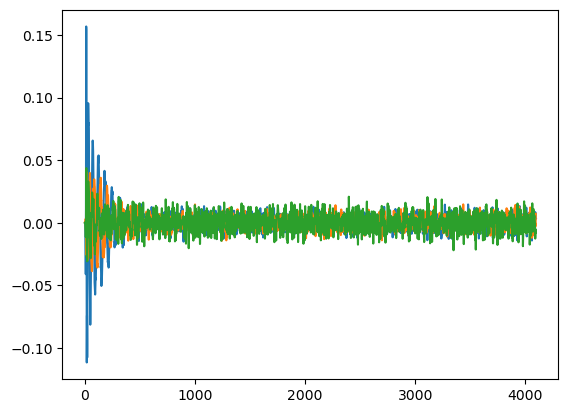

In [18]:
# Данные после фильтрации
for line in data_filt:
    plt.plot(line);